<a href="https://colab.research.google.com/github/ignaciomorenobarria21-a11y/Examen_Python/blob/main/Examen_Python_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# finanzas_utils.py

In [ ]:
def calcular_retorno_diario(precio_actual, precio_anterior):
    """
    Calcula el porcentaje de cambio entre dos precios.
    """
    retorno = ((precio_actual - precio_anterior) / precio_anterior) * 100
    return retorno

def categorizar_volatilidad(desviacion_estandar):
    """
    Clasifica la volatilidad según el porcentaje de la desviación estándar.
    """
    if desviacion_estandar < 2:
        return "Baja"
    elif 2 <= desviacion_estandar <= 5:
        return "Media"
    else:
        return "Alta"

In [ ]:
!pip install yfinance

In [6]:
import yfinance as yf
import pandas as pd
import finanzas_utils as utils
from datetime import datetime

In [12]:
import yfinance as yf
import pandas as pd
import finanzas_utils as utils
# 1.
t1 = input("Ticker 1 (AAPL): ").upper()
t2 = input("Ticker 2 (MSFT): ").upper()

# 2.
d1 = yf.download(t1, start="2025-01-01")
d2 = yf.download(t2, start="2025-01-01")

# 3
precio_hoy1 = d1['Close'].iloc[-1].item()
precio_ayer1 = d1['Close'].iloc[-2].item()

precio_hoy2 = d2['Close'].iloc[-1].item()
precio_ayer2 = d2['Close'].iloc[-2].item()

# 4.
ret1 = utils.calcular_retorno_diario(precio_hoy1, precio_ayer1)
ret2 = utils.calcular_retorno_diario(precio_hoy2, precio_ayer2)

vol1 = d1['Close'].pct_change().std().item() * 100
vol2 = d2['Close'].pct_change().std().item() * 100

# 5.
print(f"\n--- Resultados ---")
print(f"{t1}: Retorno hoy {ret1:.2f}% | Volatilidad: {utils.categorizar_volatilidad(vol1)} ({vol1:.2f}%)")
print(f"{t2}: Retorno hoy {ret2:.2f}% | Volatilidad: {utils.categorizar_volatilidad(vol2)} ({vol2:.2f}%)")

Ticker 1 (AAPL): AAPL
Ticker 2 (MSFT): MSFT


/tmp/ipython-input-1026614356.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  d1 = yf.download(t1, start="2025-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1026614356.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  d2 = yf.download(t2, start="2025-01-01")
[*********************100%***********************]  1 of 1 completed


--- Resultados ---
AAPL: Retorno hoy 0.54% | Volatilidad: Media (2.07%)
MSFT: Retorno hoy 0.40% | Volatilidad: Baja (1.55%)


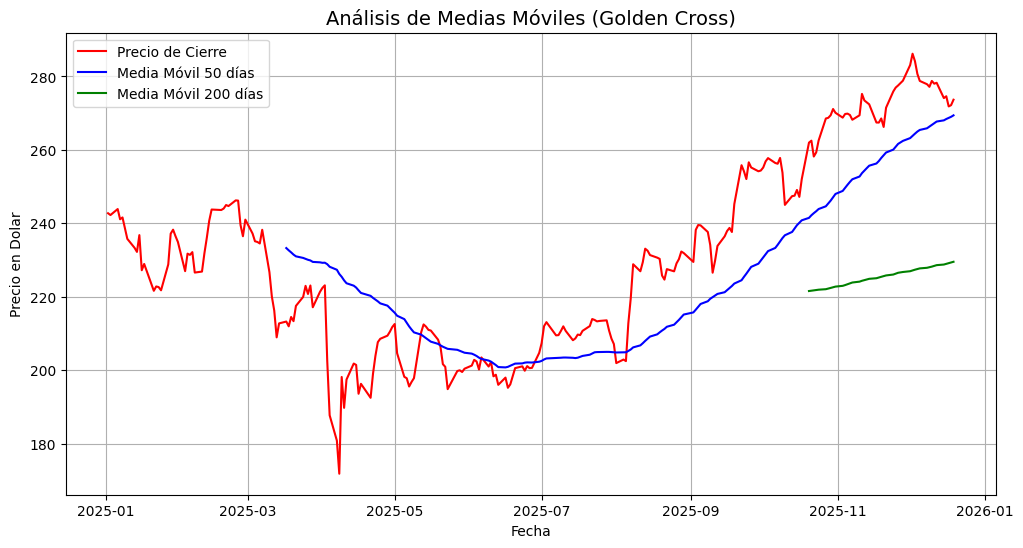

In [11]:
import matplotlib.pyplot as plt

df_grafico = d1.copy()

df_grafico['SMA50'] = df_grafico['Close'].rolling(window=50).mean()
df_grafico['SMA200'] = df_grafico['Close'].rolling(window=200).mean()


plt.figure(figsize=(12, 6))
plt.plot(df_grafico['Close'], label='Precio de Cierre', color='red')
plt.plot(df_grafico['SMA50'], label='Media Móvil 50 días', color='blue')
plt.plot(df_grafico['SMA200'], label='Media Móvil 200 días', color='green')


plt.title(f"Análisis de Medias Móviles (Golden Cross)", fontsize=14)
plt.xlabel("Fecha", fontsize=10)
plt.ylabel("Precio en Dolar", fontsize=10)
plt.legend(loc='best')
plt.grid(True)



plt.show()